### Recurrent Autoencoder
[src](http://rickyhan.com/jekyll/update/2017/09/14/autoencoders.html)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.xkcd()

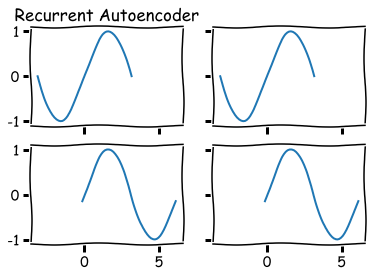

In [3]:
x1 = np.linspace(-np.pi, np.pi)
y1 = np.sin(x1)
phi = 3
x2 = np.linspace(-np.pi+phi, np.pi+phi)
y2 = np.sin(x2)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
ax1.plot(x1, y1)
ax1.set_title('Recurrent Autoencoder')
ax2.plot(x1, y1)
ax3.plot(x2, y2)
ax4.plot(x2, y2)

In [4]:
import random
def gen(batch_size):
    seq_length = 10

    batch_x = []
    batch_y = []
    for _ in range(batch_size):
        rand = random.random() * 2 * np.pi

        sig1 = np.sin(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        sig2 = np.cos(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        x1 = sig1[:seq_length]
        y1 = sig1[seq_length:]
        x2 = sig2[:seq_length]
        y2 = sig2[seq_length:]

        x_ = np.array([x1, x2])
        y_ = np.array([y1, y2])
        x_, y_ = x_.T, y_.T

        batch_x.append(x_)
        batch_y.append(y_)

    batch_x = np.array(batch_x)
    batch_y = np.array(batch_y)

    return batch_x, batch_x#batch_y

(10, 2)


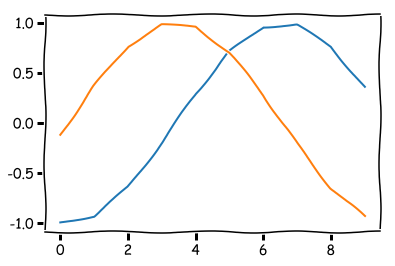

In [20]:
print gen(59)[0][0].shape
plt.plot(gen(59)[0][0])

In [8]:
from keras.models import Sequential, Model
from keras.layers import LSTM, RepeatVector

batch_size = 100
X_train, _ = gen(batch_size)

m = Sequential()
m.add(LSTM(2, input_shape=(10, 2))) 
# 2 is the output size
# input_dim: dimensionality of the input (integer). 
# input_length: Length of input sequences, to be specified when it is constant
m.add(RepeatVector(10))
m.add(LSTM(2, return_sequences=True))
print m.summary()
m.compile(loss='mse', optimizer='adam')
history = m.fit(X_train, X_train, nb_epoch=2000, batch_size=100)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2)                 40        
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 10, 2)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 2)             40        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python2.7/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/2000
100/100 [==============================] - 2s - loss: 0.4984
Epoch 2/2000
100/100 [==============================] - 0s - loss: 0.4982
Epoch 3/2000
100/100 [==============================] - 0s - loss: 0.4981
Epoch 4/2000
100/100 [==============================] - 0s - loss: 0.4979
Epoch 5/2000
100/100 [==============================] - 0s - loss: 0.4977
Epoch 6/2000
100/100 [==============================] - 0s - loss: 0.4976
Epoch 7/2000
100/100 [==============================] - 0s - loss: 0.4974
Epoch 8/2000
100/100 [==============================] - 0s - loss: 0.4973
Epoch 9/2000
100/100 [==============================] - 0s - loss: 0.4971
Epoch 10/2000
100/100 [==============================] - 0s - loss: 0.4969
Epoch 11/2000
100/100 [==============================] - 0s - loss: 0.4968
Epoch 12/2000
100/100 [==============================] - 0s - loss: 0.4966
Epoch 13/2000
100/100 [==============================] - 0s - loss: 0.4964
Epoch 14/2000
100/100 [===========

100/100 [==============================] - 0s - loss: 0.4677
Epoch 111/2000
100/100 [==============================] - 0s - loss: 0.4672
Epoch 112/2000
100/100 [==============================] - 0s - loss: 0.4667
Epoch 113/2000
100/100 [==============================] - 0s - loss: 0.4662
Epoch 114/2000
100/100 [==============================] - 0s - loss: 0.4656
Epoch 115/2000
100/100 [==============================] - 0s - loss: 0.4651
Epoch 116/2000
100/100 [==============================] - 0s - loss: 0.4646
Epoch 117/2000
100/100 [==============================] - 0s - loss: 0.4641
Epoch 118/2000
100/100 [==============================] - 0s - loss: 0.4636
Epoch 119/2000
100/100 [==============================] - 0s - loss: 0.4631
Epoch 120/2000
100/100 [==============================] - 0s - loss: 0.4626
Epoch 121/2000
100/100 [==============================] - 0s - loss: 0.4621
Epoch 122/2000
100/100 [==============================] - 0s - loss: 0.4616
Epoch 123/2000
100/100 [===

100/100 [==============================] - 0s - loss: 0.3993
Epoch 219/2000
100/100 [==============================] - 0s - loss: 0.3982
Epoch 220/2000
100/100 [==============================] - 0s - loss: 0.3971
Epoch 221/2000
100/100 [==============================] - 0s - loss: 0.3959
Epoch 222/2000
100/100 [==============================] - 0s - loss: 0.3948
Epoch 223/2000
100/100 [==============================] - 0s - loss: 0.3936
Epoch 224/2000
100/100 [==============================] - 0s - loss: 0.3924
Epoch 225/2000
100/100 [==============================] - 0s - loss: 0.3912
Epoch 226/2000
100/100 [==============================] - 0s - loss: 0.3900
Epoch 227/2000
100/100 [==============================] - 0s - loss: 0.3887
Epoch 228/2000
100/100 [==============================] - 0s - loss: 0.3875
Epoch 229/2000
100/100 [==============================] - 0s - loss: 0.3862
Epoch 230/2000
100/100 [==============================] - 0s - loss: 0.3850
Epoch 231/2000
100/100 [===

100/100 [==============================] - 0s - loss: 0.2415
Epoch 327/2000
100/100 [==============================] - 0s - loss: 0.2399
Epoch 328/2000
100/100 [==============================] - 0s - loss: 0.2383
Epoch 329/2000
100/100 [==============================] - 0s - loss: 0.2367
Epoch 330/2000
100/100 [==============================] - 0s - loss: 0.2352
Epoch 331/2000
100/100 [==============================] - 0s - loss: 0.2337
Epoch 332/2000
100/100 [==============================] - 0s - loss: 0.2323
Epoch 333/2000
100/100 [==============================] - 0s - loss: 0.2309
Epoch 334/2000
100/100 [==============================] - 0s - loss: 0.2295
Epoch 335/2000
100/100 [==============================] - 0s - loss: 0.2282
Epoch 336/2000
100/100 [==============================] - 0s - loss: 0.2269
Epoch 337/2000
100/100 [==============================] - 0s - loss: 0.2256
Epoch 338/2000
100/100 [==============================] - 0s - loss: 0.2244
Epoch 339/2000
100/100 [===

100/100 [==============================] - 0s - loss: 0.1423
Epoch 435/2000
100/100 [==============================] - 0s - loss: 0.1416
Epoch 436/2000
100/100 [==============================] - 0s - loss: 0.1410
Epoch 437/2000
100/100 [==============================] - 0s - loss: 0.1403
Epoch 438/2000
100/100 [==============================] - 0s - loss: 0.1397
Epoch 439/2000
100/100 [==============================] - 0s - loss: 0.1390
Epoch 440/2000
100/100 [==============================] - 0s - loss: 0.1384
Epoch 441/2000
100/100 [==============================] - 0s - loss: 0.1378
Epoch 442/2000
100/100 [==============================] - 0s - loss: 0.1371
Epoch 443/2000
100/100 [==============================] - 0s - loss: 0.1365
Epoch 444/2000
100/100 [==============================] - 0s - loss: 0.1359
Epoch 445/2000
100/100 [==============================] - 0s - loss: 0.1352
Epoch 446/2000
100/100 [==============================] - 0s - loss: 0.1346
Epoch 447/2000
100/100 [===

100/100 [==============================] - 0s - loss: 0.0899
Epoch 543/2000
100/100 [==============================] - 0s - loss: 0.0896
Epoch 544/2000
100/100 [==============================] - 0s - loss: 0.0893
Epoch 545/2000
100/100 [==============================] - 0s - loss: 0.0890
Epoch 546/2000
100/100 [==============================] - 0s - loss: 0.0887
Epoch 547/2000
100/100 [==============================] - 0s - loss: 0.0884
Epoch 548/2000
100/100 [==============================] - 0s - loss: 0.0881
Epoch 549/2000
100/100 [==============================] - 0s - loss: 0.0878
Epoch 550/2000
100/100 [==============================] - 0s - loss: 0.0876
Epoch 551/2000
100/100 [==============================] - 0s - loss: 0.0873
Epoch 552/2000
100/100 [==============================] - 0s - loss: 0.0870
Epoch 553/2000
100/100 [==============================] - 0s - loss: 0.0867
Epoch 554/2000
100/100 [==============================] - 0s - loss: 0.0865
Epoch 555/2000
100/100 [===

100/100 [==============================] - 0s - loss: 0.0671
Epoch 651/2000
100/100 [==============================] - 0s - loss: 0.0669
Epoch 652/2000
100/100 [==============================] - 0s - loss: 0.0668
Epoch 653/2000
100/100 [==============================] - 0s - loss: 0.0666
Epoch 654/2000
100/100 [==============================] - 0s - loss: 0.0665
Epoch 655/2000
100/100 [==============================] - 0s - loss: 0.0663
Epoch 656/2000
100/100 [==============================] - 0s - loss: 0.0662
Epoch 657/2000
100/100 [==============================] - 0s - loss: 0.0660
Epoch 658/2000
100/100 [==============================] - 0s - loss: 0.0659
Epoch 659/2000
100/100 [==============================] - 0s - loss: 0.0658
Epoch 660/2000
100/100 [==============================] - 0s - loss: 0.0656
Epoch 661/2000
100/100 [==============================] - 0s - loss: 0.0655
Epoch 662/2000
100/100 [==============================] - 0s - loss: 0.0653
Epoch 663/2000
100/100 [===

100/100 [==============================] - 0s - loss: 0.0549
Epoch 759/2000
100/100 [==============================] - 0s - loss: 0.0548
Epoch 760/2000
100/100 [==============================] - 0s - loss: 0.0548
Epoch 761/2000
100/100 [==============================] - 0s - loss: 0.0547
Epoch 762/2000
100/100 [==============================] - 0s - loss: 0.0546
Epoch 763/2000
100/100 [==============================] - 0s - loss: 0.0545
Epoch 764/2000
100/100 [==============================] - 0s - loss: 0.0544
Epoch 765/2000
100/100 [==============================] - 0s - loss: 0.0544
Epoch 766/2000
100/100 [==============================] - 0s - loss: 0.0543
Epoch 767/2000
100/100 [==============================] - 0s - loss: 0.0542
Epoch 768/2000
100/100 [==============================] - 0s - loss: 0.0541
Epoch 769/2000
100/100 [==============================] - 0s - loss: 0.0540
Epoch 770/2000
100/100 [==============================] - 0s - loss: 0.0540
Epoch 771/2000
100/100 [===

100/100 [==============================] - 0s - loss: 0.0481
Epoch 867/2000
100/100 [==============================] - 0s - loss: 0.0481
Epoch 868/2000
100/100 [==============================] - 0s - loss: 0.0480
Epoch 869/2000
100/100 [==============================] - 0s - loss: 0.0480
Epoch 870/2000
100/100 [==============================] - 0s - loss: 0.0479
Epoch 871/2000
100/100 [==============================] - 0s - loss: 0.0479
Epoch 872/2000
100/100 [==============================] - 0s - loss: 0.0478
Epoch 873/2000
100/100 [==============================] - 0s - loss: 0.0478
Epoch 874/2000
100/100 [==============================] - 0s - loss: 0.0477
Epoch 875/2000
100/100 [==============================] - 0s - loss: 0.0477
Epoch 876/2000
100/100 [==============================] - 0s - loss: 0.0476
Epoch 877/2000
100/100 [==============================] - 0s - loss: 0.0476
Epoch 878/2000
100/100 [==============================] - 0s - loss: 0.0475
Epoch 879/2000
100/100 [===

100/100 [==============================] - 0s - loss: 0.0437
Epoch 975/2000
100/100 [==============================] - 0s - loss: 0.0437
Epoch 976/2000
100/100 [==============================] - 0s - loss: 0.0436
Epoch 977/2000
100/100 [==============================] - 0s - loss: 0.0436
Epoch 978/2000
100/100 [==============================] - 0s - loss: 0.0436
Epoch 979/2000
100/100 [==============================] - 0s - loss: 0.0435
Epoch 980/2000
100/100 [==============================] - 0s - loss: 0.0435
Epoch 981/2000
100/100 [==============================] - 0s - loss: 0.0435
Epoch 982/2000
100/100 [==============================] - 0s - loss: 0.0434
Epoch 983/2000
100/100 [==============================] - 0s - loss: 0.0434
Epoch 984/2000
100/100 [==============================] - 0s - loss: 0.0434
Epoch 985/2000
100/100 [==============================] - 0s - loss: 0.0433
Epoch 986/2000
100/100 [==============================] - 0s - loss: 0.0433
Epoch 987/2000
100/100 [===

100/100 [==============================] - 0s - loss: 0.0407
Epoch 1081/2000
100/100 [==============================] - 0s - loss: 0.0406
Epoch 1082/2000
100/100 [==============================] - 0s - loss: 0.0406
Epoch 1083/2000
100/100 [==============================] - 0s - loss: 0.0406
Epoch 1084/2000
100/100 [==============================] - 0s - loss: 0.0406
Epoch 1085/2000
100/100 [==============================] - 0s - loss: 0.0405
Epoch 1086/2000
100/100 [==============================] - 0s - loss: 0.0405
Epoch 1087/2000
100/100 [==============================] - 0s - loss: 0.0405
Epoch 1088/2000
100/100 [==============================] - 0s - loss: 0.0405
Epoch 1089/2000
100/100 [==============================] - 0s - loss: 0.0404
Epoch 1090/2000
100/100 [==============================] - 0s - loss: 0.0404
Epoch 1091/2000
100/100 [==============================] - 0s - loss: 0.0404
Epoch 1092/2000
100/100 [==============================] - 0s - loss: 0.0404
Epoch 1093/2000

100/100 [==============================] - 0s - loss: 0.0383
Epoch 1187/2000
100/100 [==============================] - 0s - loss: 0.0383
Epoch 1188/2000
100/100 [==============================] - 0s - loss: 0.0383
Epoch 1189/2000
100/100 [==============================] - 0s - loss: 0.0383
Epoch 1190/2000
100/100 [==============================] - 0s - loss: 0.0383
Epoch 1191/2000
100/100 [==============================] - 0s - loss: 0.0382
Epoch 1192/2000
100/100 [==============================] - 0s - loss: 0.0382
Epoch 1193/2000
100/100 [==============================] - 0s - loss: 0.0382
Epoch 1194/2000
100/100 [==============================] - 0s - loss: 0.0382
Epoch 1195/2000
100/100 [==============================] - 0s - loss: 0.0382
Epoch 1196/2000
100/100 [==============================] - 0s - loss: 0.0381
Epoch 1197/2000
100/100 [==============================] - 0s - loss: 0.0381
Epoch 1198/2000
100/100 [==============================] - 0s - loss: 0.0381
Epoch 1199/2000

100/100 [==============================] - 0s - loss: 0.0364
Epoch 1293/2000
100/100 [==============================] - 0s - loss: 0.0364
Epoch 1294/2000
100/100 [==============================] - 0s - loss: 0.0364
Epoch 1295/2000
100/100 [==============================] - 0s - loss: 0.0364
Epoch 1296/2000
100/100 [==============================] - 0s - loss: 0.0363
Epoch 1297/2000
100/100 [==============================] - 0s - loss: 0.0363
Epoch 1298/2000
100/100 [==============================] - 0s - loss: 0.0363
Epoch 1299/2000
100/100 [==============================] - 0s - loss: 0.0363
Epoch 1300/2000
100/100 [==============================] - 0s - loss: 0.0363
Epoch 1301/2000
100/100 [==============================] - 0s - loss: 0.0363
Epoch 1302/2000
100/100 [==============================] - 0s - loss: 0.0362
Epoch 1303/2000
100/100 [==============================] - 0s - loss: 0.0362
Epoch 1304/2000
100/100 [==============================] - 0s - loss: 0.0362
Epoch 1305/2000

100/100 [==============================] - 0s - loss: 0.0347
Epoch 1399/2000
100/100 [==============================] - 0s - loss: 0.0347
Epoch 1400/2000
100/100 [==============================] - 0s - loss: 0.0346
Epoch 1401/2000
100/100 [==============================] - 0s - loss: 0.0346
Epoch 1402/2000
100/100 [==============================] - 0s - loss: 0.0346
Epoch 1403/2000
100/100 [==============================] - 0s - loss: 0.0346
Epoch 1404/2000
100/100 [==============================] - 0s - loss: 0.0346
Epoch 1405/2000
100/100 [==============================] - 0s - loss: 0.0346
Epoch 1406/2000
100/100 [==============================] - 0s - loss: 0.0345
Epoch 1407/2000
100/100 [==============================] - 0s - loss: 0.0345
Epoch 1408/2000
100/100 [==============================] - 0s - loss: 0.0345
Epoch 1409/2000
100/100 [==============================] - 0s - loss: 0.0345
Epoch 1410/2000
100/100 [==============================] - 0s - loss: 0.0345
Epoch 1411/2000

100/100 [==============================] - 0s - loss: 0.0331
Epoch 1505/2000
100/100 [==============================] - 0s - loss: 0.0331
Epoch 1506/2000
100/100 [==============================] - 0s - loss: 0.0331
Epoch 1507/2000
100/100 [==============================] - 0s - loss: 0.0330
Epoch 1508/2000
100/100 [==============================] - 0s - loss: 0.0330
Epoch 1509/2000
100/100 [==============================] - 0s - loss: 0.0330
Epoch 1510/2000
100/100 [==============================] - 0s - loss: 0.0330
Epoch 1511/2000
100/100 [==============================] - 0s - loss: 0.0330
Epoch 1512/2000
100/100 [==============================] - 0s - loss: 0.0330
Epoch 1513/2000
100/100 [==============================] - 0s - loss: 0.0330
Epoch 1514/2000
100/100 [==============================] - 0s - loss: 0.0330
Epoch 1515/2000
100/100 [==============================] - 0s - loss: 0.0329
Epoch 1516/2000
100/100 [==============================] - 0s - loss: 0.0329
Epoch 1517/2000

100/100 [==============================] - 0s - loss: 0.0318
Epoch 1611/2000
100/100 [==============================] - 0s - loss: 0.0318
Epoch 1612/2000
100/100 [==============================] - 0s - loss: 0.0318
Epoch 1613/2000
100/100 [==============================] - 0s - loss: 0.0318
Epoch 1614/2000
100/100 [==============================] - 0s - loss: 0.0318
Epoch 1615/2000
100/100 [==============================] - 0s - loss: 0.0318
Epoch 1616/2000
100/100 [==============================] - 0s - loss: 0.0318
Epoch 1617/2000
100/100 [==============================] - 0s - loss: 0.0317
Epoch 1618/2000
100/100 [==============================] - 0s - loss: 0.0317
Epoch 1619/2000
100/100 [==============================] - 0s - loss: 0.0317
Epoch 1620/2000
100/100 [==============================] - 0s - loss: 0.0317
Epoch 1621/2000
100/100 [==============================] - 0s - loss: 0.0317
Epoch 1622/2000
100/100 [==============================] - 0s - loss: 0.0317
Epoch 1623/2000

100/100 [==============================] - 0s - loss: 0.0308
Epoch 1717/2000
100/100 [==============================] - 0s - loss: 0.0307
Epoch 1718/2000
100/100 [==============================] - 0s - loss: 0.0307
Epoch 1719/2000
100/100 [==============================] - 0s - loss: 0.0307
Epoch 1720/2000
100/100 [==============================] - 0s - loss: 0.0307
Epoch 1721/2000
100/100 [==============================] - 0s - loss: 0.0307
Epoch 1722/2000
100/100 [==============================] - 0s - loss: 0.0307
Epoch 1723/2000
100/100 [==============================] - 0s - loss: 0.0307
Epoch 1724/2000
100/100 [==============================] - 0s - loss: 0.0307
Epoch 1725/2000
100/100 [==============================] - 0s - loss: 0.0307
Epoch 1726/2000
100/100 [==============================] - 0s - loss: 0.0307
Epoch 1727/2000
100/100 [==============================] - 0s - loss: 0.0307
Epoch 1728/2000
100/100 [==============================] - 0s - loss: 0.0306
Epoch 1729/2000

100/100 [==============================] - 0s - loss: 0.0298
Epoch 1823/2000
100/100 [==============================] - 0s - loss: 0.0298
Epoch 1824/2000
100/100 [==============================] - 0s - loss: 0.0298
Epoch 1825/2000
100/100 [==============================] - 0s - loss: 0.0298
Epoch 1826/2000
100/100 [==============================] - 0s - loss: 0.0297
Epoch 1827/2000
100/100 [==============================] - 0s - loss: 0.0297
Epoch 1828/2000
100/100 [==============================] - 0s - loss: 0.0297
Epoch 1829/2000
100/100 [==============================] - 0s - loss: 0.0297
Epoch 1830/2000
100/100 [==============================] - 0s - loss: 0.0297
Epoch 1831/2000
100/100 [==============================] - 0s - loss: 0.0297
Epoch 1832/2000
100/100 [==============================] - 0s - loss: 0.0297
Epoch 1833/2000
100/100 [==============================] - 0s - loss: 0.0297
Epoch 1834/2000
100/100 [==============================] - 0s - loss: 0.0297
Epoch 1835/2000

100/100 [==============================] - 0s - loss: 0.0289
Epoch 1929/2000
100/100 [==============================] - 0s - loss: 0.0289
Epoch 1930/2000
100/100 [==============================] - 0s - loss: 0.0289
Epoch 1931/2000
100/100 [==============================] - 0s - loss: 0.0289
Epoch 1932/2000
100/100 [==============================] - 0s - loss: 0.0289
Epoch 1933/2000
100/100 [==============================] - 0s - loss: 0.0289
Epoch 1934/2000
100/100 [==============================] - 0s - loss: 0.0289
Epoch 1935/2000
100/100 [==============================] - 0s - loss: 0.0289
Epoch 1936/2000
100/100 [==============================] - 0s - loss: 0.0288
Epoch 1937/2000
100/100 [==============================] - 0s - loss: 0.0288
Epoch 1938/2000
100/100 [==============================] - 0s - loss: 0.0288
Epoch 1939/2000
100/100 [==============================] - 0s - loss: 0.0288
Epoch 1940/2000
100/100 [==============================] - 0s - loss: 0.0288
Epoch 1941/2000

In [21]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2)                 40        
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 10, 2)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 2)             40        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


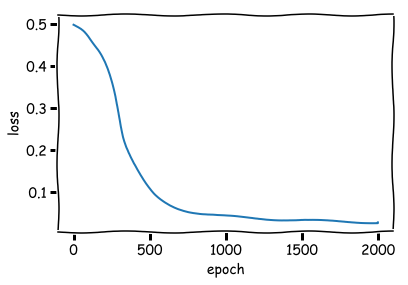

In [23]:
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")

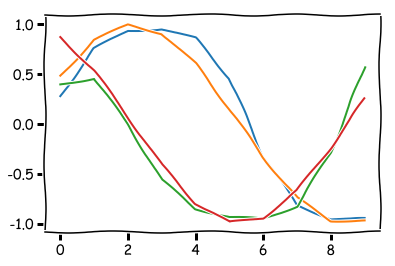

In [32]:
X_test, _ = gen(1)
decoded_imgs = m.predict(X_test)

for i in range(2):
    plt.plot(range(10), decoded_imgs[0, :, i])
    plt.plot(range(10), X_test[0, :, i])


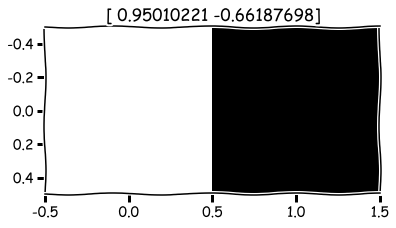

In [35]:
encoder = Model(m.layers[0].input, m.layers[0].output)
encoded_imgs = encoder.predict(X_test)
for i in range(len(encoded_imgs)):
    plt.imshow(encoded_imgs[i].reshape((1, 2)))
    plt.gray()
plt.title(encoded_imgs[i])
dos_numeros = encoded_imgs[i]

In [38]:
from keras.layers import Input
x = Input(shape=(2,))
decoded = m.layers[1](x)
decoded = m.layers[2](decoded)
decoder = Model(x, decoded)

In [39]:
import matplotlib.animation as animation
from IPython.display import HTML
from numpy import random

(-1, 1)

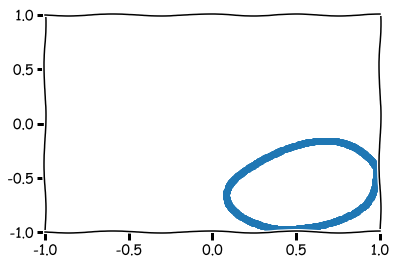

In [42]:
X_test, _ = gen(1000)
latent_vec = encoder.predict(X_test)
plt.scatter(latent_vec[:, 0], latent_vec[:, 1])
plt.xlim(-1,1)
plt.ylim(-1,1)

### anomaly detection

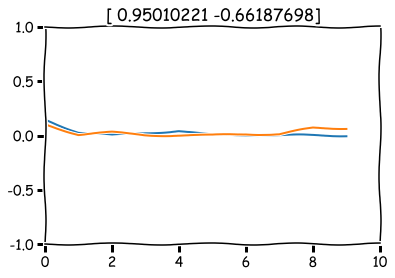

In [59]:
X_test, _ = gen(1)
decoded_imgs = m.predict(X_test)

for i in range(2):
    plt.plot(range(10), np.square(X_test[0, :, i] - decoded_imgs[0, :, i]), label="MSE")

plt.ylim(-1,1)
plt.xlim(0,10)
plt.title(dos_numeros)

(0, 10)

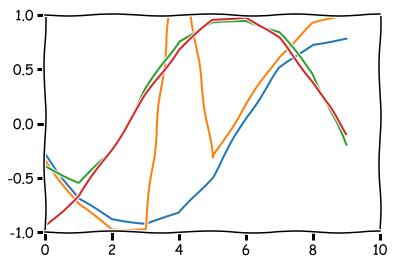

In [62]:
X_test, _ = gen(1)
X_test[0, 4, 0] = X_test[0, 4, 0] + 2.5
decoded_imgs = m.predict(X_test)

for i in range(2):
    plt.plot(decoded_imgs[0, :, i])
    plt.plot(X_test[0, :, i])

plt.ylim(-1,1)
plt.xlim(0,10)

(0, 10)

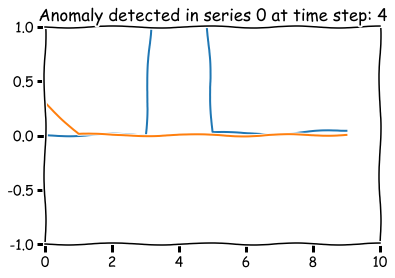

In [63]:
for i in range(2):
    mse = np.square(np.abs(X_test[0, :, i] - decoded_imgs[0, :, i]))
    anomaly = np.argmax(mse)
    if mse[anomaly] > 0.4:
        plt.title("Anomaly detected in series {} at time step: {}".format(i, anomaly))
    plt.plot(range(10), mse, label="MSE")

plt.ylim(-1,1)
plt.xlim(0,10)